## Probability Distributions

A probability distribution is a description of how likely a random or a set of random variables is to take on each of its possible states. The description of a probability distribution depends on whether the random variables are discrete or continuous.

### Discrete Variables and Probability Mass Functions

A probability mass function (PMF) is a mathematical function that describes the probability of a discrete random variable taking on a certain value. In other words, the PMF maps each possible value of a discrete random variable to its probability of occurring.

The PMF is defined as follows:

For a discrete random variable X, the probability mass function p(x) is defined as:

p(x) = P(X = x)

where P(X = x) is the probability that X takes on the value x.

The PMF satisfies the following properties:

- Non-negativity: p(x) >= 0 for all possible values of X.
- Normalization: The sum of the PMF over all possible values of X is equal to 
∑ p(x) = 1
- Probability interpretation: The value of the PMF at a particular value of X gives the probability of X taking on that value.

In [ ]:
import scipy.stats as stats

# Define the probability mass function for a binomial distribution
n = 10  # number of trials
p = 0.5  # probability of success
binom_pmf = stats.binom.pmf(range(n+1), n, p)
binom_cmf = stats.binom.cdf(range(n+1), n, p)
# Print the PMF values
print("PMF values for a binomial distribution with n={} and p={}:".format(n, p))
for x, pmf in enumerate(binom_pmf):
    print("P(X = {}) = {}".format(x, pmf))


PMF values for a binomial distribution with n=10 and p=0.5:
P(X = 0) = 0.0009765625
P(X = 1) = 0.009765625000000002
P(X = 2) = 0.04394531250000004
P(X = 3) = 0.1171875
P(X = 4) = 0.2050781249999999
P(X = 5) = 0.24609375000000003
P(X = 6) = 0.2050781249999999
P(X = 7) = 0.11718749999999999
P(X = 8) = 0.04394531250000004
P(X = 9) = 0.009765625000000002
P(X = 10) = 0.0009765625


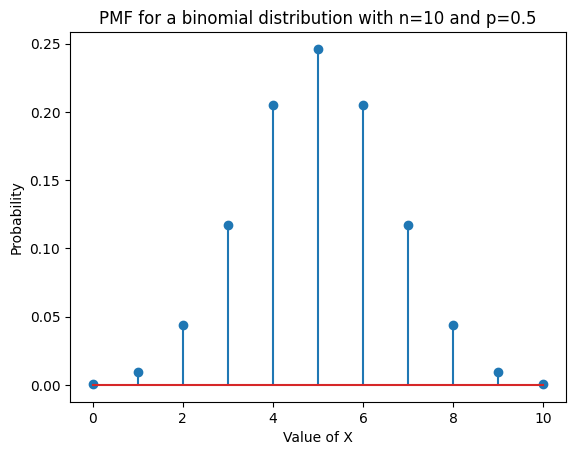

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.stem(range(n+1), binom_pmf)
plt.title("PMF for a binomial distribution with n={} and p={}".format(n, p))
plt.xlabel("Value of X")
plt.ylabel("Probability")
plt.show()

### Cumulative Mass Function

A cumulative mass function (CMF) is a function that gives the cumulative probability up to a certain value of a discrete random variable. In other words, the CMF gives the probability that a random variable takes on a value less than or equal to a given value.

The CMF is a non-decreasing function that ranges from 0 to 1. It can be visualized as a step function, with the steps occurring at each possible value of 'X'.

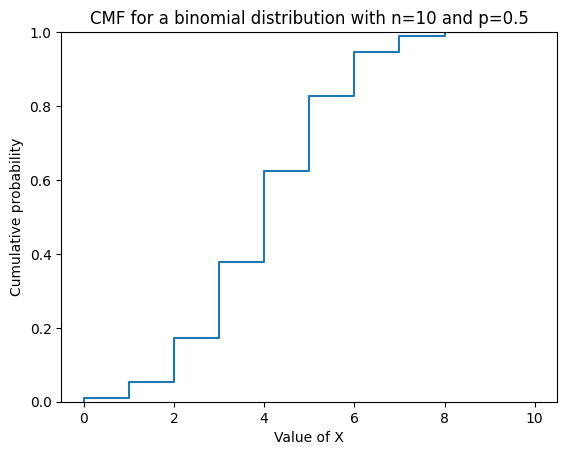

In [ ]:
plt.step(range(n+1), binom_cmf)
plt.title("CMF for a binomial distribution with n={} and p={}".format(n, p))
plt.xlabel("Value of X")
plt.ylabel("Cumulative probability")
plt.ylim([0, 1])
plt.show()

## Continuous Variables and Probability Density Functions

A probability density function (PDF) is a function that describes the relative likelihood of a continuous random variable taking on a particular value. In other words, the PDF gives the probability density at each possible value of the random variable.

The PDF is non-negative and integrates to 1 over the entire range of possible values of X. The PDF is used to calculate probabilities of events involving the random variable by integrating the PDF over the relevant range of values.

For a continuous random variable 'X', the PDF is related to the CDF through integration:
$$ F(x) = ∫_{-∞}^{x} f(t) dt$$

In other words, the CDF is the area under the PDF up to and including the value x.

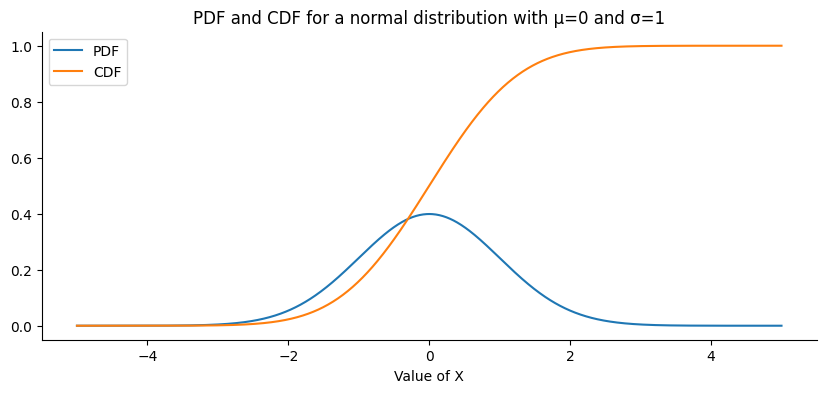

In [ ]:
# Example: PDF and CDF for a normal distribution
import numpy as np
from scipy.stats import norm

mu = 0
sigma = 1
x_values = np.linspace(-5, 5, num=1000)
pdf_values = norm.pdf(x_values, loc=mu, scale=sigma)
cdf_values = norm.cdf(x_values, loc=mu, scale=sigma)

# Plot the PDF and CDF
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(x=x_values, y=pdf_values, label="PDF")
sns.lineplot(x=x_values, y=cdf_values, label="CDF")
ax.set(title="PDF and CDF for a normal distribution with μ={} and σ={}".format(mu, sigma),
       xlabel="Value of X", ylabel="")
sns.despine()
plt.legend()
plt.show()

### Marginal Probability

A marginal probability distribution is a probability distribution that describes the probabilities of a subset of variables in a joint probability distribution. In other words, it is the probability distribution of one or more variables obtained by marginalizing over the other variables in the joint distribution.

Suppose we have a joint probability distribution `P(X,Y)` for two discrete random variables `X` and `Y`. The marginal probability distribution of X is obtained by summing the probabilities of all possible outcomes of X for each fixed value of Y. Mathematically, the marginal probability mass function of X is:

$$P(X=x) = \sum_{y} P(X=x, Y=y)$$

For continuous random variables, we integrate over the other variable(s) instead of summing. The marginal probability density function is given by:

$$f_X(x) = ∫ f(x,y) dy$$

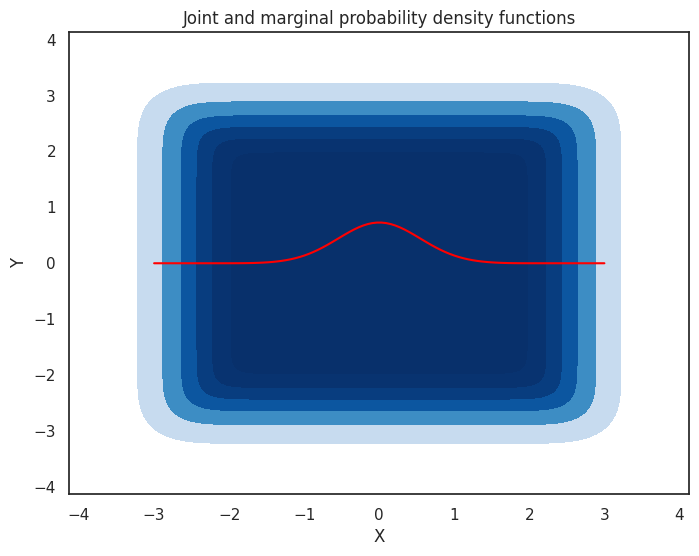

In [ ]:
# Example: joint probability density function for X and Y
from scipy.stats import multivariate_normal

mean = [0, 0]
cov = [[1, 0.5], [0.5, 0.3]]
rv = multivariate_normal(mean, cov)
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
xy = np.column_stack([X.flat, Y.flat])
fxy = rv.pdf(xy).reshape(X.shape)

# Marginal probability density function of X
fx = np.sum(fxy, axis=1) * (y[1] - y[0])

# Create the plot
sns.set(style="white")
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(data=xy, x=X.flat, y=Y.flat, levels=10, fill=True, cmap="Blues")
sns.lineplot(x=x, y=fx, color="red")
ax.set(title="Joint and marginal probability density functions",
       xlabel="X", ylabel="Y")
plt.show()

### Conditional Probability

A conditional probability distribution describes the probabilities of one or more variables given the value(s) of one or more other variables. In other words, it is a probability distribution of a variable(s) that is conditional on the value(s) of other variable(s).

For example, suppose we have a joint probability distribution for two discrete random variables `X` and `Y`. The conditional probability distribution of Y given `X=x` is the probability distribution of Y when we know that X takes the value x. It is denoted by `P(Y|X=x)` and is given by:

$$ P(Y=y|X=x) = P(X=x, Y=y) / P(X=x) $$

Suppose we have a joint probability distribution for two discrete random variables `X` and `Y` as follows:

In [ ]:
# Joint probability distribution for X and Y
pxy = np.array([[0.1, 0.2, 0.3],
                [0.15, 0.1, 0.05],
                [0.05, 0.15, 0.0]])

# Conditional probability distribution of Y given X=1
x = 1
py_given_x = pxy[x,:] / pxy[x,:].sum()
print(py_given_x)

[0.5        0.33333333 0.16666667]


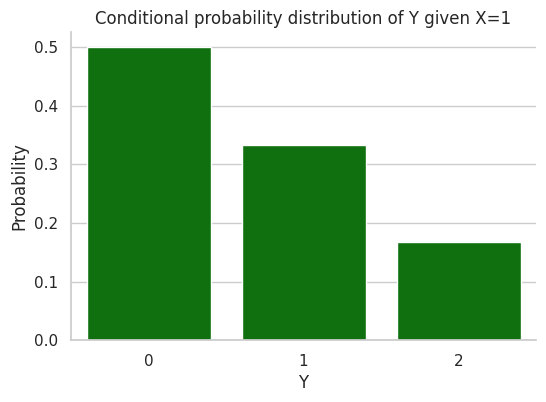

In [ ]:
# Visualize the conditional probability distribution
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=[0, 1, 2], y=py_given_x, color="green")
ax.set(title="Conditional probability distribution of Y given X=1",
       xlabel="Y", ylabel="Probability")
sns.despine()
plt.show()

### The chain Rule

The chain rule states that the probability of a sequence of events is equal to the product of the probability of the first event and the conditional probability of each subsequent event given all previous events.

Suppose we have n events X$_1$, X$_2$, ..., X$_n$. The chain rule states that the joint probability of these events can be calculated as:

$$ P(X_1, X_2, ..., X_n) = P(X_1) * P(X_2|X_1) * P(X_3|X_1,X_2) * ... * P(X_n|X_,X_2,...,X_{n-1}) $$


In [ ]:
# Calculate the joint probability of X=0 and Y=1 given X=0 for distribution used for calculating conditional probability
x = 0
y = 1
p_x0 = pxy[x,:].sum()
p_y1_given_x0 = pxy[x,y] / p_x0
p_x0_y1 = p_x0 * p_y1_given_x0
print("P(X=0, Y=1 | X=0) =", p_x0_y1)

P(X=0, Y=1 | X=0) = 0.2


### Independence and Conditional Independence

Two events A and B are **independent** if the occurrence of one event does not affect the probability of the other event. Mathematically, this can be expressed as:

P(A and B) = P(A) * P(B)

Two events A and B are conditionally independent given a third event C if the occurrence of C makes A and B independent. Mathematically, this can be expressed as:

P(A and B | C) = P(A | C) * P(B | C)

In [ ]:
# Define two independent random variables X and Y
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
px = np.array([0.3, 0.4, 0.3])
py = np.array([0.2, 0.5, 0.3])

# Check if X and Y are independent
pxy = np.outer(px, py)
if np.allclose(pxy, np.outer(px, py)):
    print("X and Y are independent")

# Define two random variables X and Y that are conditionally independent given Z
z = np.array([1, 2])
pz = np.array([0.4, 0.6])
px_given_z = np.array([[0.2, 0.3],
                       [0.1, 0.4],
                       [0.3, 0.0]])
py_given_z = np.array([[0.5, 0.1],
                       [0.2, 0.2],
                       [0.1, 0.3]])
pxy_given_z = np.array([[[0.1, 0.02],
                         [0.12, 0.08]],
                        [[0.06, 0.03],
                         [0.12, 0.16]],
                        [[0.15, 0.0],
                         [0.0, 0.09]]])

# Check if X and Y are conditionally independent given Z
if np.allclose(pxy_given_z, px_given_z[:,:,np.newaxis] * py_given_z[:,np.newaxis,:]):
    print("X and Y are conditionally independent given Z")


X and Y are independent


In [ ]:
P_W = {'sunny': 0.3, 'rainy': 0.7}
P_S_given_W = {'sunny': {'on': 0.56, 'off': 0.44}, 'rainy': {'on': 0.25, 'off': 0.75}}
P_G_given_S = {'on': {'wet': 0.75, 'dry': 0.25}, 'off': {'wet': 0.75, 'dry': 0.25}}

def check_conditional_independence():
    for w in ['sunny', 'rainy']:
        for s in ['on', 'off']:
            for g in ['wet', 'dry']:
                P_G_and_S_given_W = P_G_given_S[s][g] * P_S_given_W[w][s]
                P_G_given_W = sum([P_G_given_S[s_prime][g] * P_S_given_W[w][s_prime] * P_W[w] for s_prime in ['on', 'off']]) / P_W[w]
                P_S_given_W_val = P_S_given_W[w][s]
                
                if not round(P_G_and_S_given_W, 2) == round(P_G_given_W * P_S_given_W_val, 2):
                    print(f'P(G={g}, S={s} | W={w}): {P_G_and_S_given_W:.5f} != P(G={g} | W={w}) * P(S={s} | W={w}): {P_G_given_W * P_S_given_W_val:.5f}')
                    return False
    return True

print("Conditional independence:", check_conditional_independence())


Conditional independence: True


## Mean, Variance and Covariance

- The **mean** of a probability distribution is also called the expected value and is denoted by E(X). It represents the average value of a random variable X over multiple trials or observations. It is calculated as the sum of the product of each possible value of X and its corresponding probability.

$$ E[f(X)] = ∑f(x) P(X = x)$$, where x is the possible values of X and P(X = x) is the probability of X taking the value x.

- The **variance** of X measures how spread out the values of X are from the mean. It is calculated as the average of the squared differences between each value of X and the mean, weighted by their respective probabilities, i.e.,

$$Var[f(X)] = E[(f(X) - E[f(X)])^2]$$

- The covariance between two random variables X and Y is a measure of their linear relationship. It is calculated as the average of the product of the deviations of each variable from their respective means, weighted by their joint probabilities, i.e.,

$$ Cov(X, Y) = E[(X - E(X))(Y - E(Y))] = ∑(x - E(X))(y - E(Y)) P(X = x, Y = y)$$

**The notions of covariance and dependence are related but distinct concepts. For two variables to have zero covariance, there must be no linear dependence between them. Independence is a stronger requirement than zero covariance, because independence also excludes nonlinear relationships.**

In [96]:
%%capture
!pip install matplotlib ipywidgets

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from ipywidgets import interact, FloatSlider

# Function to create the scatter plot with confidence ellipses
def plot_ellipse(mean_x, mean_y, var_x, cov_xy, var_y):
    mean = [mean_x, mean_y]
    covariance = [[var_x, cov_xy], [cov_xy, var_y]]
    data = np.random.multivariate_normal(mean, covariance, size=500)

    x = data[:, 0]
    y = data[:, 1]

    # Calculate the confidence ellipses
    rv = multivariate_normal(mean, covariance)
    x_range = np.linspace(x.min(), x.max(), 100)
    y_range = np.linspace(y.min(), y.max(), 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = rv.pdf(np.dstack((X, Y)))

    # Plot the data points and confidence ellipses
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.6)
    plt.contour(X, Y, Z, levels=3, colors='r', linewidths=1.5)
    plt.title("Scatter plot with Confidence Ellipses")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Interactive sliders
mean_x_slider = FloatSlider(min=-10, max=10, step=0.1, value=0, description="Mean X")
mean_y_slider = FloatSlider(min=-10, max=10, step=0.1, value=0, description="Mean Y")
var_x_slider = FloatSlider(min=0.1, max=10, step=0.1, value=1, description="Variance X")
cov_xy_slider = FloatSlider(min=-1, max=1, step=0.01, value=0.5, description="Covariance")
var_y_slider = FloatSlider(min=0.1, max=10, step=0.1, value=1, description="Variance Y")

# Connect the sliders to the plotting function
interact(plot_ellipse, mean_x=mean_x_slider, mean_y=mean_y_slider, var_x=var_x_slider, cov_xy=cov_xy_slider, var_y=var_y_slider)


interactive(children=(FloatSlider(value=0.0, description='Mean X', max=10.0, min=-10.0), FloatSlider(value=0.0…

<function __main__.plot_ellipse(mean_x, mean_y, var_x, cov_xy, var_y)>

## Common probability distributions

1. ### Bernoulli distribution

The Bernoulli distribution is a probability distribution that describes the outcomes of a single binary experiment or trial, where the outcome is either success (with probability p) or failure (with probability 1-p).

The Bernoulli distribution is characterized by a single parameter, p, which represents the probability of success. The probability mass function of a Bernoulli random variable X with parameter p is:

P(X = 1) = p

P(X = 0) = 1 - p

where X = 1 represents success and X = 0 represents failure. The expected value or mean of X is `E(X) = p`, and the variance of X is `Var(X) = p(1-p)`.



In [99]:
from ipywidgets import interact, widgets
def plot_bernoulli(p):
    x = np.array([0, 1])
    pmf = np.array([1-p, p])
    plt.stem(x, pmf, use_line_collection=True)
    plt.ylim(0, 1)
    plt.title("Bernoulli Distribution (p = {})".format(p))
    plt.xlabel("Outcome")
    plt.ylabel("Probability")
    plt.show()

interact(plot_bernoulli, p=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5));

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

2. ###  Multinomial distribution

The Multinomial distribution is a generalization of the Bernoulli distribution and the Binomial distribution, where the number of outcomes k is greater than 2.

The Multinomial distribution is characterized by two parameters: n, the number of trials, and a probability vector p = ($p_1, p_2, ..., p_k$), where pi represents the probability of the ith outcome in each trial, and the sum of all probabilities is equal to 1.

The probability mass function of a Multinomial random variable `X` with parameters n and p is:

$$ P(X_1 = x_1, X_2 = x_2, ..., X_k = x_k) = \frac{n!}{x_1! x_2! ... x_k!} p_{1}^{x_1} p_{2}^{x_2} ... p_{k}^{x_k} $$

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

def plot_multinomial(n, p1, p2, p3):
    # check that the sum of p1, p2, and p3 is <= 1
    if p1 + p2 + p3 > 1:
        print("Error: The sum of p1, p2, and p3 cannot exceed 1.")
        return
    
    # generate random samples from a Multinomial distribution
    x = np.random.multinomial(n, [p1, p2, p3])
    
    # plot the probabilities for each category
    labels = ['Category 1', 'Category 2', 'Category 3']
    plt.bar(labels, x/n)
    plt.title("Multinomial Distribution (n = {}, p = [{}, {}, {}])".format(n, p1, p2, p3))
    plt.xlabel("Categories")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    plt.show()

# create interactive slider widgets for n, p1, p2, and p3
n_slider = widgets.IntSlider(min=1, max=100, step=1, value=10)
p1_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.33)
p2_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.33)
p3_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.34)

# display the interactive plot using the sliders
interact(plot_multinomial, n=n_slider, p1=p1_slider, p2=p2_slider, p3=p3_slider);


interactive(children=(IntSlider(value=10, description='n', min=1), FloatSlider(value=0.33, description='p1', m…

3. ### Poisson Distribution 

The Poisson distribution describes the probability of a given number of events occurring in a fixed interval of time or space, under the assumption that the events occur independently and at a constant rate. 

The Poisson distribution is characterized by a single parameter λ (lambda), which represents the expected number of events that occur in the given interval. The probability mass function of a Poisson random variable X with parameter λ is:

$$ P(X = k) = \frac{e^{-λ} λ^k}{k!} $$

The expected value or mean of X is E(X) = λ, and the variance of X is Var(X) = λ.

In [114]:
from scipy.stats import poisson

def plot_poisson_distribution(lam):
    x = np.arange(0, 3 * lam + 1)
    y = poisson.pmf(x, lam)

    plt.figure(figsize=(12, 6))
    plt.bar(x, y, align='center', alpha=0.6)
    plt.xlabel('Number of events')
    plt.ylabel('Probability')
    plt.title(f'Poisson Distribution with λ = {lam:.2f}')
    plt.grid(True)
    plt.show()

interact(
    plot_poisson_distribution,
    lam=FloatSlider(min=0.1, max=15, step=0.1, value=4, description='λ')
)


interactive(children=(FloatSlider(value=4.0, description='λ', max=15.0, min=0.1), Output()), _dom_classes=('wi…

<function __main__.plot_poisson_distribution(lam)>

4. ### Gaussian distribution

A Gaussian distribution, also known as a normal distribution or a bell curve, is a continuous probability distribution that has a symmetric bell-shaped curve. It is defined by two parameters: the mean (µ) and the standard deviation (σ). The mean represents the central location of the distribution, while the standard deviation measures the spread or dispersion of the distribution.

The probability density function (PDF) of a Gaussian distribution is given by:

$$ f(x) = \frac{1}{σ \sqrt{2π}} \exp^{-(x - µ)^2 / (2 σ^2)}$$

The multivariate normal distribution, also known as the multivariate Gaussian distribution, is a generalization of the univariate normal (Gaussian) distribution to multiple dimensions. It is a continuous probability distribution defined over a vector space of n dimensions, where each dimension corresponds to a random variable.

The multivariate normal distribution is characterized by a mean vector (µ) and a covariance matrix (Σ). The mean vector is an n-dimensional vector that represents the central location of the distribution, while the covariance matrix is an n x n symmetric, positive semi-definite matrix that describes the shape, spread, and the correlations among the random variables.

The probability density function (PDF) of an n-dimensional multivariate normal distribution is given by:

$$ f(x) = \frac{1}{(2 π)^{n/2} |Σ|^{1/2})} \exp^{-0.5(x - µ)^T  Σ^{-1} (x - µ)} $$

In [115]:
from scipy.stats import norm

def plot_gaussian_distribution(mu, sigma):
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    y = norm.pdf(x, mu, sigma)

    plt.figure(figsize=(12, 6))
    plt.plot(x, y, label=f'µ = {mu}, σ = {sigma}')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title('Gaussian Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()

interact(
    plot_gaussian_distribution,
    mu=FloatSlider(min=-10, max=10, step=0.1, value=0, description='µ'),
    sigma=FloatSlider(min=0.1, max=5, step=0.1, value=1, description='σ')
)

interactive(children=(FloatSlider(value=0.0, description='µ', max=10.0, min=-10.0), FloatSlider(value=1.0, des…

<function __main__.plot_gaussian_distribution(mu, sigma)>

5. ### Exponential and Laplace distributions

- The **exponential** distribution used to model the time between events in a Poisson point process, which is a process in which events occur continuously and independently at a constant average rate. It is a one-parameter family of distributions, characterized by its rate parameter (λ), which is the average number of events per unit time or space.

The probability density function (PDF) of an exponential distribution is given by:

$$ f(x) = λ \exp^{-λ x}, \text{for} \ x ≥ 0 $$

Some important properties of the exponential distribution are:

- It is memoryless, which means that the probability of an event occurring after a certain time depends only on the time elapsed and not on the past history.
- The mean of the distribution is 1/λ, and the variance is 1/λ².

- The **Laplace** distribution, also known as the double exponential distribution, is a continuous probability distribution used to model the difference between two independent, identically distributed exponential random variables. It is characterized by two parameters: the location parameter (µ), which represents the central location of the distribution, and the scale parameter (b), which controls the spread of the distribution.

The probability density function (PDF) of a Laplace distribution is given by:

$$ f(x) = \frac{1 }{2b} \exp^{(\frac{-|x - µ| }{b})} $$

Some important properties of the Laplace distribution are:

- It has heavier tails and a sharper peak around the mean compared to the Gaussian distribution, making it more suitable for modeling data with large outliers or heavy-tailed distributions.
- The mean of the distribution is µ, and the variance is 2 b².



In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, laplace
from ipywidgets import interact, IntSlider, FloatSlider

def plot_distributions(exp_lambda, laplace_mu, laplace_b):
    x = np.linspace(-10, 10, 1000)
    
    # Exponential Distribution
    exp_y = expon.pdf(x, scale=1/exp_lambda)
    
    # Laplace Distribution
    laplace_y = laplace.pdf(x, loc=laplace_mu, scale=laplace_b)

    plt.figure(figsize=(12, 6))
    
    plt.plot(x, exp_y, label=f'Exponential (λ = {exp_lambda})')
    plt.plot(x, laplace_y, label=f'Laplace (µ = {laplace_mu}, b = {laplace_b})')
    
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title('Exponential and Laplace Distributions')
    plt.legend()
    plt.grid(True)
    plt.show()

interact(
    plot_distributions,
    exp_lambda=FloatSlider(min=0.1, max=2, step=0.1, value=1, description='λ'),
    laplace_mu=FloatSlider(min=-5, max=5, step=0.1, value=0, description='µ'),
    laplace_b=FloatSlider(min=0.1, max=5, step=0.1, value=1, description='b')
)


interactive(children=(FloatSlider(value=1.0, description='λ', max=2.0, min=0.1), FloatSlider(value=0.0, descri…

<function __main__.plot_distributions(exp_lambda, laplace_mu, laplace_b)>

## The central limit theorem

The Central Limit Theorem (CLT) is a fundamental result in probability theory and statistics that states that the sum (or average) of a large number of independent and identically distributed (i.i.d.) random variables, each with finite mean and variance, tends to a normal (Gaussian) distribution as the number of variables goes to infinity, regardless of the original distribution of the variables.

Let's formalize this statement using equations:

Consider a sequence of independent and identically distributed random variables ($ X_1, X_2, ..., X_n$), where each random variable $X_i$ has a mean (µ) and a variance (σ²):

E($X_i$) = µ

Var($X_i$) = σ²

Now, let's define the sum $S_n$ and the sample mean $M_n$ of these random variables as follows:

$S_n$ = $ X_1 + X_2 + ... + X_n$ 

$M_n = S_n / n = (X_1 + X_2 + ... + X_n) / n$

The Central Limit Theorem states that as n → ∞, the distribution of the standardized version of Mₙ, which is ($ M_n - µ) / (σ / √n)$, converges to a standard normal distribution (mean 0 and variance 1):

$$ \frac{M_n - µ}{σ / √n} → N(0, 1) \ \ \text{as} \ \ n → ∞ $$


The Central Limit Theorem has some important implications:

- It justifies the use of normal distribution approximations for the sampling distribution of the sample mean and other sample statistics when dealing with large sample sizes.
- It provides the theoretical foundation for many statistical methods, such as hypothesis testing, confidence intervals, and linear regression, which are based on the assumption of normality.

It is important to note that the Central Limit Theorem does not imply that the distribution of the individual random variables must be normal. The theorem holds true for a wide range of distributions, as long as they have finite mean and variance. However, the rate at which the distribution of the sample mean approaches normality depends on the shape of the original distribution.




In [133]:
def plot_clt(n_samples, sample_size):
    # Uniform distribution
    uniform_data = np.random.uniform(-1, 1, size=(n_samples, sample_size))
    uniform_means = np.mean(uniform_data, axis=1)

    # Exponential distribution
    exp_data = np.random.exponential(scale=1, size=(n_samples, sample_size))
    exp_means = np.mean(exp_data, axis=1)

    # Binomial distribution
    binomial_data = np.random.binomial(n=10, p=0.5, size=(n_samples, sample_size))
    binomial_means = np.mean(binomial_data, axis=1)

    # Plotting the histograms of the sample means
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 3, 1)
    plt.hist(uniform_means, bins=20, density=True)
    plt.title('Uniform Distribution Sample Means')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')

    plt.subplot(3, 3, 2)
    plt.hist(exp_means, bins=20, density=True)
    plt.title('Exponential Distribution Sample Means')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')

    plt.subplot(3, 3, 3)
    plt.hist(binomial_means, bins=20, density=True)
    plt.title('Binomial Distribution Sample Means')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

interact(
    plot_clt,
    n_samples=IntSlider(min=10, max=5000, step=100, value=1000, description='n_samples'),
    sample_size=IntSlider(min=10, max=200, step=10, value=50, description='sample_size')
)


interactive(children=(IntSlider(value=1000, description='n_samples', max=5000, min=10, step=100), IntSlider(va…

<function __main__.plot_clt(n_samples, sample_size)>

### In case you want to create a gif

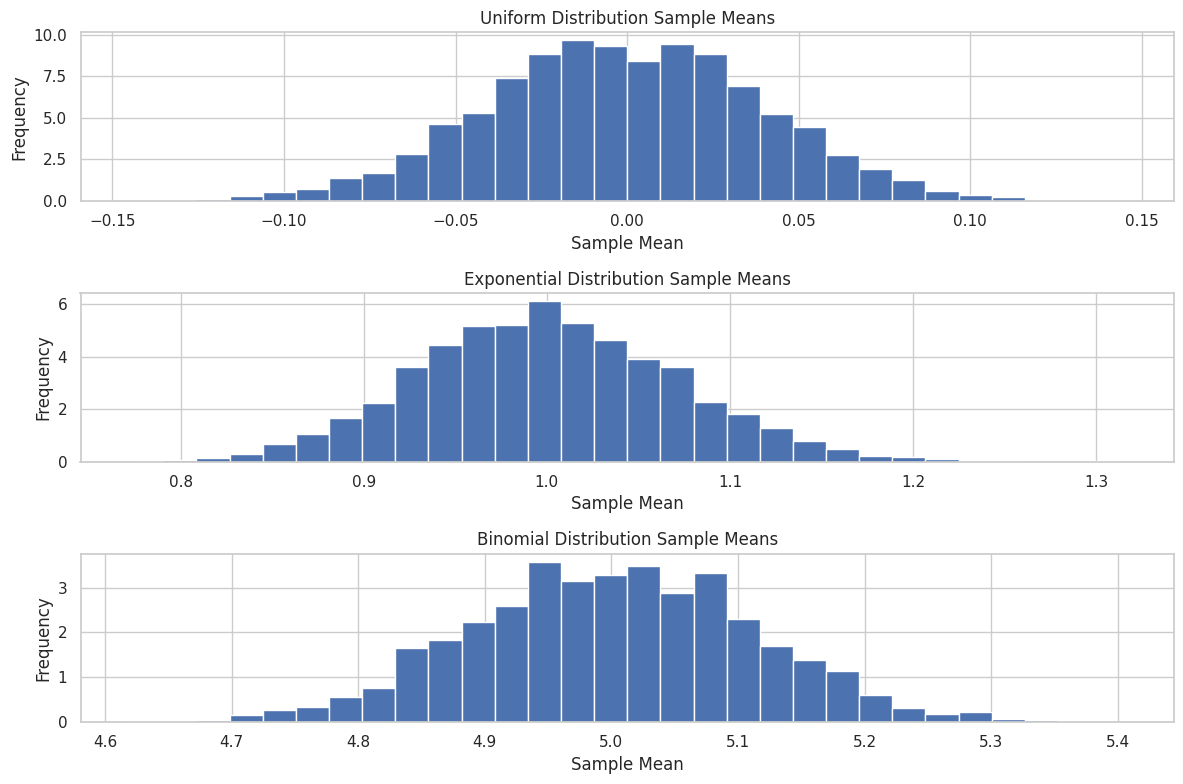

In [129]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

# def plot_clt(n_samples, sample_size, ax):
#     # Clear the previous plots
#     ax[0].clear()
#     ax[1].clear()
#     ax[2].clear()

#     # Generate the data
#     uniform_data = np.random.uniform(-1, 1, size=(n_samples, sample_size))
#     uniform_means = np.mean(uniform_data, axis=1)

#     exp_data = np.random.exponential(scale=1, size=(n_samples, sample_size))
#     exp_means = np.mean(exp_data, axis=1)

#     binomial_data = np.random.binomial(n=10, p=0.5, size=(n_samples, sample_size))
#     binomial_means = np.mean(binomial_data, axis=1)

#     # Plot the data
#     ax[0].hist(uniform_means, bins=30, density=True)
#     ax[0].set_title('Uniform Distribution Sample Means')
#     ax[0].set_xlabel('Sample Mean')
#     ax[0].set_ylabel('Frequency')

#     ax[1].hist(exp_means, bins=30, density=True)
#     ax[1].set_title('Exponential Distribution Sample Means')
#     ax[1].set_xlabel('Sample Mean')
#     ax[1].set_ylabel('Frequency')

#     ax[2].hist(binomial_means, bins=30, density=True)
#     ax[2].set_title('Binomial Distribution Sample Means')
#     ax[2].set_xlabel('Sample Mean')
#     ax[2].set_ylabel('Frequency')

#     plt.tight_layout()

# def update(frame):
#     n_samples, sample_size = frame
#     plot_clt(n_samples, sample_size, ax)
#     return []

# # Set up the animation parameters
# n_samples_values = np.linspace(100, 5000, num=10, dtype=int)
# sample_size_values = np.linspace(10, 200, num=10, dtype=int)

# animation_frames = [(n_samples, sample_size) for n_samples in n_samples_values for sample_size in sample_size_values]

# # Create the animation
# fig, ax = plt.subplots(3, 1, figsize=(12, 8))
# ani = FuncAnimation(fig, update, frames=animation_frames, blit=True, repeat=True, interval=500)

# # Save the animation as a GIF
# ani.save('clt_animation.gif', writer='imagemagick', fps=2)

# # Uncomment the line below if you want to save the animation as an MP4 video
# # ani.save('clt_animation.mp4', writer='ffmpeg', fps=2, dpi=100)
